In [14]:
from abc import *
import numpy as np
from typing import Any
import math
import matplotlib.pyplot as plt
import sympy as sy

In [37]:
class Distribution:

   @abstractmethod
   def get_sy(self)->Any:
      pass
   
   @abstractmethod
   def get_dist(self):
      pass
   
   def plot(self, start=0, end=1):
      x_axis = np.linspace(start, end, min(math.ceil((end-start)*100),500))
      dist = self.get_dist()
      points = np.array([[x,dist(x)] for x in x_axis])

      plt.plot(points[:,0], points[:,1])

      plt.show()
      


In [38]:
class BinomialDistribution(Distribution):
    def __init__(self, N, k) -> None:
        self.N = N
        self.k = k
    
    def get_sy(self) -> Any:
        theta = sy.symbols('theta')
        return sy.factorial(
        self.N)/sy.factorial(self.k)/sy.factorial(self.N-self.k)*theta**self.k*(1-theta)**(self.N-self.k)
    
    def get_dist(self):
        def BinomialDistribution(theta):
            return math.comb(self.N, self.k)*theta**self.k*(1-theta)**(self.N-self.k)

        return BinomialDistribution

        

In [54]:
N = sy.symbols('N')
k = sy.symbols('k')
theta = sy.symbols('theta')
binomialFormula = sy.factorial(
        N)/sy.factorial(k)/sy.factorial(N-k)*theta**k*(1-theta)**(N-k)
I = sy.Integral(binomialFormula, (theta, 0, 1))
print(sy.pretty(binomialFormula))
print(sy.pretty(I))
print(binomialFormula.subs({N:10,k:2,theta:0.5}).evalf())


 k        N - k   
θ ⋅(1 - θ)     ⋅N!
──────────────────
   k!⋅(N - k)!    
1                      
⌠                      
⎮  k        N - k      
⎮ θ ⋅(1 - θ)     ⋅N!   
⎮ ────────────────── dθ
⎮    k!⋅(N - k)!       
⌡                      
0                      
0.0439453125000000


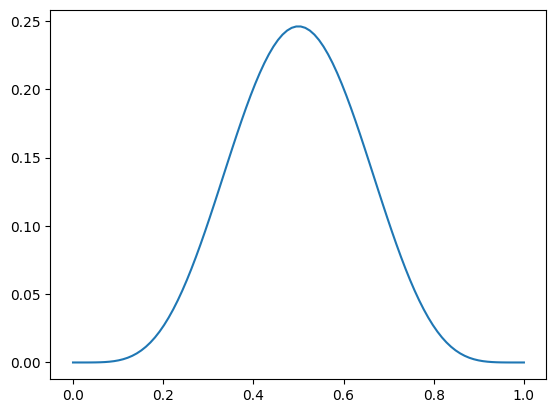

<function __main__.BinomialDistribution.get_dist.<locals>.BinomialDistribution(theta)>

In [40]:
binom = BinomialDistribution(10,5)

binom.plot()

In [55]:
def ag(**symbols):
    N = sy.symbols('N')
    k = sy.symbols('k')
    theta = sy.symbols('theta')
    binomialFormula = sy.factorial(N)/sy.factorial(k)/sy.factorial(N-k)*theta**k*(1-theta)**(N-k)
    print(binomialFormula.subs(symbols).evalf())

In [56]:
ag(N=10,k=2,theta=0.5)

0.0439453125000000


In [1]:
class Parent:
    def it(self):
        self.b = 'hi'
        

In [2]:
class Child(Parent):
    def __init__(self) -> None:
        super().__init__()
        super().it()
        print(self.b)

c = Child()

hi


In [8]:
def hi(**symbols):
    print(symbols['K'],)

hi(N='N')

KeyError: 'K'

In [13]:
def createObj(key: str = 'name', value: str = 'zz',**kargs):
    '''
    return: {'name': 'zz'}
    '''
    res = {key: value}
    res.update(kargs)
    return res

createObj('hi','bye',k='z')

{'hi': 'bye', 'k': 'z'}